# Compute and plot tide from OTPS2 (TPXO8) fortran code

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import datetime
import pandas
import urllib2, urllib
import pytides
import os
import subprocess
import copy
from netCDF4 import Dataset


In [3]:
#define point of measurement

In [4]:
#start date
tstamp='20160601.000'
tin=datetime.datetime.strptime(tstamp,"%Y%m%d.%H%M%S")

In [5]:
#end day
estamp='20160630.000'
ed=datetime.datetime.strptime(estamp,"%Y%m%d.%H%M%S")

## READ tide gauge measurements

In [6]:
df = pandas.read_csv('temp/CO-OPS__8735180__wl.csv', index_col=0, parse_dates=True)

In [7]:
df[:1]

,Water Level,Sigma,O,F,R,L,Quality
Date Time,,,,,,,
2016-06-01,0.331,0.007,0,0,0,0,v


In [8]:
water_level = df[' Water Level'][:]

<IPython.core.display.Javascript object>


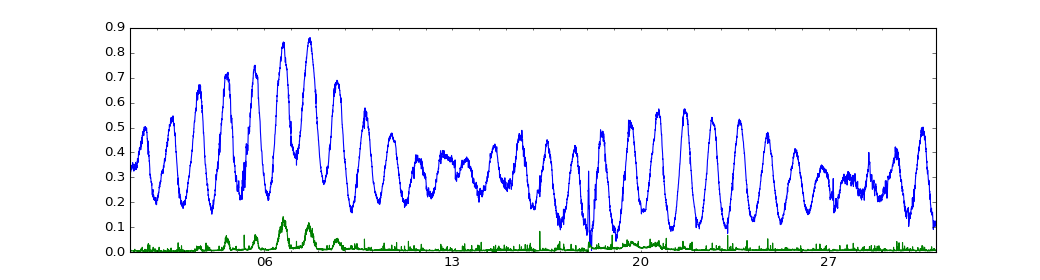

In [9]:
ax = water_level.plot(figsize=(13,3.5))
df[' Sigma'].plot(ax=ax)

## Compute constituents from measurements

In [10]:
demeaned=water_level.values-water_level.values.mean()

In [11]:
tide=pytides.tide.Tide.decompose(demeaned, water_level.index.to_datetime())

In [12]:
constituent = [c.name for c in tide.model['constituent']]

In [13]:
c=pandas.DataFrame(tide.model, index=constituent).drop('constituent', axis=1)

In [14]:
c.sort_values('amplitude', ascending=False).head(10)

,amplitude,phase
S2,17.411983,255.359344
R2,16.397668,79.333426
K2,7.635366,98.724927
T2,7.518558,249.686751
S1,4.369424,124.871172
P1,2.362719,311.927745
K1,2.288751,299.049274
L2,2.150839,261.219124
lambda2,1.776472,343.850702
nu2,0.574485,345.319122


## validating tide analysis

###  read tide prediction

In [15]:
dtd = pandas.read_csv('temp/CO-OPS__8735180__pr.csv', index_col=0, parse_dates=True)

In [16]:
dtd[:1]

,Prediction
Date Time,
2016-06-01,0.124


## compute tide from constituents

In [17]:
dates=pandas.date_range(start='2016-06-01',end='2016-06-30',freq='6T')

In [18]:
hours=np.cumsum(np.r_[0, [t.total_seconds()/3600.0 for t in np.diff(dates.to_pydatetime())]])

In [19]:
times=pytides.tide.Tide._times(dates[0], hours)

In [32]:
validation = pandas.Series(tide.at(times), index=dates)

In [30]:
estimate = pandas.Series(tide.at(times) + water_level.values.mean(), index=dates)

<IPython.core.display.Javascript object>


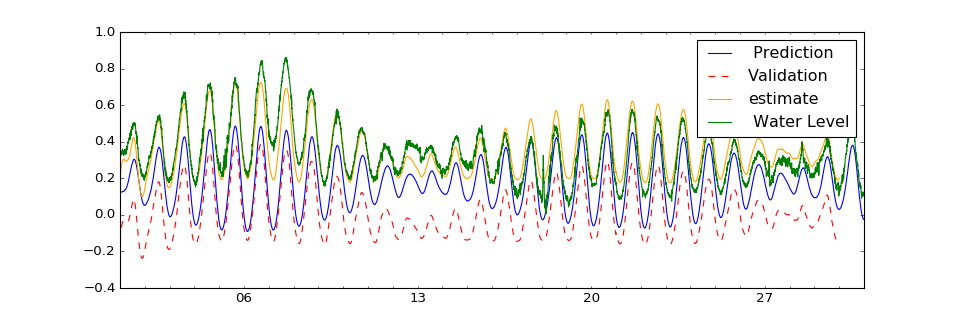

In [33]:
ax = dtd.plot(figsize=(12,4))
validation.plot(ax=ax, color='red', linestyle='--', label='Validation')
estimate.plot(ax=ax, color='orange', label='estimate')
water_level.plot(ax=ax)
leg=ax.legend(loc='best')

In [22]:
print('Form number {}, the tide is {}.'.format(tide.form_number()[0], tide.classify()))

Form number 0.139736340508, the tide is semidiurnal.
